In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install --upgrade scikit-learn  # scikit-learn 0.20 이상이 필요하다.

    100% |████████████████████████████████| 5.4MB 6.9MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [2]:
from google.colab import drive

drive.mount('./now1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./now1


In [3]:
cd now1/My Drive

/content/now1/My Drive


In [4]:
cd DACON

/content/now1/My Drive/DACON


In [5]:
ls

아파트가격예측_181117.ipynb  아파트가격예측_181127.ipynb    dacon_data/
아파트가격예측_181121.ipynb  아파트가격예측_181210_1.ipynb  result_df1_chk.xlsx
아파트가격예측_181124.ipynb  아파트가격예측_181210.ipynb    result_df1.xlsx
아파트가격예측_181126.ipynb  아파트가격예측_181211.ipynb    result_df2.csv


In [0]:
import glob

files = glob.glob('dacon_data/*')

In [7]:
files

['dacon_data/address_code.xls',
 'dacon_data/Schools.csv',
 'dacon_data/submission.csv',
 'dacon_data/test.csv',
 'dacon_data/Subways.csv',
 'dacon_data/train.csv']

In [8]:
train_raw = pd.read_csv(files[5], encoding='utf-8')
print(train_raw.shape)
train_raw.head()

(1601458, 25)


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


In [0]:
# 랜덤하게 섞은 다음 train set과 test set을 나눈다.
# from sklearn.model_selection import train_test_split
# Trainset, Testset = train_test_split(train_raw, test_size=0.3, random_state=42)

In [0]:
# print(Trainset.shape)
# print(Testset.shape)


# 데이터 이상치 제거: outlier제거, 0, NaN값 제거

In [10]:
#TR= Trainset[ :500000].copy()
TR= train_raw.copy()
#TR= Trainset.copy()
TR.shape

(1601458, 25)

In [0]:
#TR.reset_index(inplace= True)

In [13]:
#TR.drop('index', axis=1, inplace= True)
TR.head(3)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000


In [0]:
## TR['total_parking_capacity_in_site'] # 평균적인 세대수대비 주차공간을 계산하여 넣는다.
# TR['heat_type'] # nan값을 '-'으로 대체한다.
# TR['heat_fuel'] # nan값을 '-'으로 대체한다.
# TR['front_door_structure'] # nan값을 '-'으로 대체한다.


nanIdx = TR[TR['total_parking_capacity_in_site'].isnull()].index #평균적인 세대수대비 주차공간(1.0)을 계산하여 넣는다.
if nanIdx.any():
    TR.loc[nanIdx, 'total_parking_capacity_in_site']=  TR.loc[nanIdx, 'total_household_count_in_sites']
    
nanIdx = TR[TR['heat_type'].isnull()].index # nan값을 '-'으로 대체한다.
if nanIdx.any():
    TR.loc[nanIdx, 'heat_type']=  '-'

nanIdx = TR[TR['heat_fuel'].isnull()].index # nan값을 '-'으로 대체한다.
if nanIdx.any():
    TR.loc[nanIdx, 'heat_fuel']=  '-'
    
nanIdx = TR[TR['front_door_structure'].isnull()].index # 376개, '-'으로 대체한다.
if nanIdx.any():
    TR.loc[nanIdx, 'front_door_structure']=  '-'
    




In [0]:
# TR['room_count']# nan값 및 0을 평수에 따라 방수를 적절하게 대체한다.
# TR['bathroom_count'] # nan값 및 0을 평수에 따라 욕실수를 적절하게 대체한다.

def fill_room(s):
    if s < 50:
        return 2
    elif 50 <= s < 100:
        return 3
    elif 100 <= s < 150:
        return 4
    else:
        return 5

# 50평 이하 2개
# 50평 100평 사이 3개
# 100평 150평 사이 4개
# 150평 이상 5개
nanIdx = TR[TR['room_count'].isnull()].index
if nanIdx.any():
    TR.loc[nanIdx, 'room_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_room)
    
nanIdx = TR[TR['room_count'] == 0].index
if nanIdx.any():
    TR.loc[nanIdx, 'room_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_room)

In [0]:
def fill_bathroom(s):
    if s < 50:
        return 1
    elif 50 <= s < 200:
        return 2
    else:
        return 3

# 50평 이하 1개
# 50평 200평 사이 2개
# 200평 이상 3개
nanIdx = TR[TR['bathroom_count'].isnull()].index
if nanIdx.any():
    TR.loc[nanIdx, 'bathroom_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_bathroom)

nanIdx = TR[TR['bathroom_count'] == 0].index
if nanIdx.any():
    TR.loc[nanIdx, 'bathroom_count'] = TR.loc[nanIdx, 'exclusive_use_area'].apply(fill_bathroom)

# 데이터 특성추출: 중요특성들을 뽑아내어 새로운 데이터셋 구성

In [0]:
# 중요한 데이터 위주로 데이터셋 다시 만들기

# key                                   
# apartment_id                   삭제       
# city                                  
# transaction_year_month         라벨화       
# transaction_date               삭제      
# year_of_completion             거래년도 - 준공년도      
# exclusive_use_area                
# floor                                
# latitude                       삭제     
# longitude                      삭제      
# address_by_law                 라벨화          
# total_parking_capacity_in_site   세대수 대비 주차대수로 바꾼다.    
# total_household_count_in_sites        
# apartment_building_count_in_sites         
# tallest_building_in_sites       삭제  
# lowest_building_in_sites      삭제     
# heat_type                     라벨화      
# heat_fuel                     라벨화       
# room_id                       삭제      
# supply_area                   전용면적 대비 공급면적으로 바꾼다.      
# total_household_count_of_area_type    삭제 (희소성을 나타내는건가?)
# room_count                    라벨화        
# bathroom_count                라벨화       
# front_door_structure          라벨화       
# transaction_real_price        

# 추가: 
# 주위 1km이내 지하철역 개수
# 주위 1km이내 학교 개수




In [0]:
# 시간은? 
# 년 6,7,8,9,10,11,12,13,14,15,16,17,18 숫자로 (나중에 minmax scaler로 스케일링한다.)
# 월 1,2,3,4,5,6,7,8,9,10,11,12 -> 인코딩
# 일 1~10, 11~20, 21~28, 21~30, 21~31 -> 인코딩 (제외)

year=[]
month=[]

for i in TR['transaction_year_month'].values:  
    i= str(i)
    year.append(int(i[2:4]))
    month.append(int(i[4:]))
    

In [18]:
# 주소는? -> 위치, 동 제외
# 시: 기존에 있음.
# 구: 주소를 기반으로 찾는다.
# 주위 지하철역 개수, 학교 개수: 주소를 기반으로 역으로 찾는다.
# 11 350 10400   서울특별시 노원구  하계동
# 26 140 10200   부산광역시 서구   동대신동2가

# 법정동코드 (앞2자리: 시/도, 앞5자리: 시/군/구, 앞8자리: 읍/면/동)
# 법정동 코드 (10자리) : 법적주소
# 시도(2)+시군구(3)+읍면동(3)+리(2)
# 보다 자세한 법정동 코드체계는 아래 행정표준코드관리시스템 > 법정동코드목록조회에서 찾아보실 수 있습니다. 
# https://www.code.go.kr/stdcode/regCodeL.do
    
# 추가데이터 확보
# 국토교통부 실거래가 공개시스템  (http://rt.molit.go.kr/)

# adr_code = pd.read_excel('./dacon_data/address_code.xls', encoding='utf-8')
# print(adr_code.shape)
# adr_code.head()

# gu_list_all= []
# for i in adr_code['법정동코드'].values:
#     if str(i)[-5:] == '00000':
#         gu_list_all.append(str(i)[:5])

# print('구 개수: ', len(gu_list_all)) #41개의 구가 있다. # 763개의 동이 있다.

gu_list= []
for i in TR['address_by_law'].values:
    gu_list.append(str(i)[:5])

print(len(gu_list))

len(pd.Series(gu_list).unique()) # 모든 구가 포함되어있음. 41개의 특성으로 원핫인코딩



1601458


41

In [19]:
# 주소(동)에 위치한 지하철역 개수

subways = pd.read_csv(files[4], encoding='utf-8')
print(subways.shape)
subways_cnt_s= subways['address_by_law'].value_counts()
subways_cnt_list= []
# for j in TR['address_by_law'].values:
#     i= subways[subways['address_by_law']== j ].index
#     subways_cnt_list.append(len(i))
# 처리시간이 너무 오래걸린다.

for j in TR['address_by_law'].values:
    try:
        subways_cnt_list.append(subways_cnt_s.loc[j])
    except KeyError:
        subways_cnt_list.append(0)
    

# 주소(동)에 위치한 학교 개수

schools = pd.read_csv(files[1], encoding='utf-8')
print(schools.shape)
schools_cnt_s= schools['address_by_law'].value_counts()
schools_cnt_list= []

for j in TR['address_by_law'].values:
    try:
        schools_cnt_list.append(schools_cnt_s.loc[j])
    except KeyError:
        schools_cnt_list.append(0)



(405, 5)
(1921, 9)


In [0]:
apt_age_year_list=[]
for i,j in zip(TR['transaction_year_month'].values, TR['year_of_completion'].values) :
    i= str(i)
    apt_age_year_list.append(int(i[0:4]) - j)



In [0]:
# -------------------------------------정리
# key    키id (랜덤하게 섞어서 학습시킴)
# city   시 (2)
# region  구 (41)
# subway_count 지하철역개수
# school_count 학교개수
# transcation_year 거래년도 
# transcation_month 거래월 (12)
# apt_age_year 아파트 나이 
# exclusive_use_area 
# floor 층수
# parking_ratio 주차대수/세대수
# total_household_count_in_sites 세대수
# apartment_building_count_in_sites 동수
# heat_type 난방방식 (3)
# heat_fuel 난방연료 (3)
# area_ratio 전용면적/공급면적
# room_count 방개수
# bathroom_count 욕실개수
# front_door_structure 현관복도구조 (4)

# price 실거래가

# TR1_col=['key','city','region','subway_count','school_count','transcation_year','transcation_month',
#          'apt_age_year','floor','parking_ratio','total_household_count_in_sites','apartment_building_count_in_sites',
#          'heat_type','heat_fuel','area_ratio','room_count','bathroom_count','front_door_structure', 'price']

In [34]:
TR1 = TR[['key']].copy()
TR1['city'] = TR['city']
TR1['region'] = pd.Series(gu_list)
TR1['address_by_law'] = TR['address_by_law'] # 추가
TR1['subway_count'] = pd.Series(subways_cnt_list)
TR1['school_count'] = pd.Series(schools_cnt_list)
TR1['transcation_year'] = pd.Series(year)
TR1['transcation_month'] = pd.Series(month)
TR1['apt_age_year'] = pd.Series(apt_age_year_list)
# TR1['exclusive_use_area'] = TR['exclusive_use_area'] # 전용면적 삭제
TR1['floor'] = TR['floor']
TR1['parking_ratio'] = TR['total_parking_capacity_in_site'] / TR['total_household_count_in_sites']
TR1['total_household_count_in_sites'] = TR['total_household_count_in_sites']
TR1['apartment_building_count_in_sites'] = TR['apartment_building_count_in_sites']
TR1['heat_type'] = TR['heat_type']
TR1['heat_fuel'] = TR['heat_fuel']
TR1['area_ratio'] = TR['exclusive_use_area'] / TR['supply_area']
TR1['room_count'] = TR['room_count']
TR1['bathroom_count'] = TR['bathroom_count']
TR1['front_door_structure'] = TR['front_door_structure']
TR1['transaction_real_price'] = TR['transaction_real_price'] / TR['exclusive_use_area'] # 면적당 실거래가
TR1.shape





(1601458, 20)

In [22]:
TR1.head(3)

,key,city,region,address_by_law,subway_count,school_count,transcation_year,transcation_month,apt_age_year,floor,parking_ratio,total_household_count_in_sites,apartment_building_count_in_sites,heat_type,heat_fuel,area_ratio,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,1,11110,1111017100,0,0,6,1,7,6,1.198529,136,1,individual,gas,0.722688,1.0,1.0,corridor,4.532996e+06
1,1,1,11110,1111017100,0,0,6,1,7,8,1.198529,136,1,individual,gas,0.722756,2.0,1.0,corridor,4.507550e+06
2,2,1,11110,1111017400,1,3,6,1,14,8,1.541880,585,5,individual,gas,0.755943,2.0,1.0,corridor,3.071298e+06


# 데이터 준비: 모델링에 적용할수있는 형식으로 만든다.

## (1) 카테고리화된 값(범주형특성)들은 원핫인코딩
## (2) 연속적인 숫자들은 스케일링

In [0]:
#!pip install --upgrade scikit-learn  # scikit-learn 0.20 이상이 필요하다.

In [0]:
# 원핫인코딩
# region  구 (41)
# transcation_month 거래월 (12)
# heat_type 난방방식 (4) ['individual' 'district' 'central' '-']
# heat_fuel 난방연료 (3) ['gas' 'cogeneration' '-']
# front_door_structure 현관복도구조 (4) ['stairway' 'corridor' 'mixed' '-']


from sklearn.preprocessing import OneHotEncoder

def get_onehot_dummies(s, prefix):
    enc = OneHotEncoder(categories='auto')
    s_re = s.values.reshape(-1, 1)
    s_1hot = enc.fit_transform(s_re).toarray()
    s_1hot= s_1hot.astype(np.int8)
    print(s_1hot.shape[1])
    
    col_list= []
    for i in range(s_1hot.shape[1]):
        col_list.append(prefix+str(i))
        
    s_df= pd.DataFrame(s_1hot, index= s.index, columns= col_list)

    return enc, s_df




In [36]:
enc_rg, df_rg = get_onehot_dummies(TR1['region'], prefix= 'rg')
enc_mo, df_mo = get_onehot_dummies(TR1['transcation_month'], prefix= 'mo')
enc_ht, df_ht = get_onehot_dummies(TR1['heat_type'], prefix= 'ht')
enc_hf, df_hf = get_onehot_dummies(TR1['heat_fuel'], prefix= 'hf')
enc_fd, df_fd = get_onehot_dummies(TR1['front_door_structure'], prefix= 'fd')
# 41, 12, 4, 3, 4

41
12
4
3
4


In [0]:
# dummies_region= pd.get_dummies(TR1['region'], prefix ='region')
# dummies_tr_month= pd.get_dummies(TR1['transcation_month'], prefix ='tr_month')
# dummies_heat_type= pd.get_dummies(TR1['heat_type'], prefix ='heat_type') 
# dummies_heat_fuel= pd.get_dummies(TR1['heat_fuel'], prefix ='heat_fuel')
# dummies_fr_door_str= pd.get_dummies(TR1['front_door_structure'], prefix ='fr_door_str')

In [0]:
try:
    TR1= TR1.join(df_rg)
except:
    print('dummies_region 이미 추가되었음.')
try:
    #del TR1['region']
    pass
except:
    print('region 컬럼 이미 삭제됨')

try:
    TR1= TR1.join(df_mo)
except:
    print('dummies_tr_month 이미 추가되었음.')
try:
    del TR1['transcation_month']
except:
    print('transcation_month 컬럼 이미 삭제됨')


try:
    TR1= TR1.join(df_ht)
except:
    print('dummies_heat_type 이미 추가되었음.')
try:
    del TR1['heat_type']
except:
    print('heat_type 컬럼 이미 삭제됨')
    
try:
    TR1= TR1.join(df_hf)
except:
    print('dummies_heat_fuel 이미 추가되었음.')
try:
    del TR1['heat_fuel']
except:
    print('heat_fuel 컬럼 이미 삭제됨')

try:
    TR1= TR1.join(df_fd)
except:
    print('dummies_fr_door_str 이미 추가되었음.')
try:
    del TR1['front_door_structure']
except:
    print('front_door_structure 컬럼 이미 삭제됨')
    
    
    

In [39]:
print(TR1.shape)
TR1.head()
# (1121020, 79)

(1601458, 80)


,key,city,region,address_by_law,subway_count,school_count,transcation_year,apt_age_year,floor,parking_ratio,...,ht1,ht2,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3
0,0,1,11110,1111017100,0,0,6,7,6,1.198529,...,0,0,1,0,0,1,0,1,0,0
1,1,1,11110,1111017100,0,0,6,7,8,1.198529,...,0,0,1,0,0,1,0,1,0,0
2,2,1,11110,1111017400,1,3,6,14,8,1.541880,...,0,0,1,0,0,1,0,1,0,0
3,3,1,11110,1111017400,1,3,6,13,11,0.981502,...,0,0,1,0,0,1,0,1,0,0
4,4,1,11110,1111017400,1,3,6,13,7,0.981502,...,0,0,1,0,0,1,0,0,0,1


In [0]:
# 컬럼 순서바꾸기

# TR1= TR1[['key', 'city', 'subway_count', 'school_count', 'transcation_year',
#        'apt_age_year', 'exclusive_use_area', 'floor', 'parking_ratio',
#        'total_household_count_in_sites', 'apartment_building_count_in_sites',
#        'area_ratio', 'room_count', 'bathroom_count',
#        'rg0', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg7', 'rg8', 'rg9',
#        'rg10', 'rg11', 'rg12', 'rg13', 'rg14', 'rg15', 'rg16', 'rg17', 'rg18',
#        'rg19', 'rg20', 'rg21', 'rg22', 'rg23', 'rg24', 'rg25', 'rg26', 'rg27',
#        'rg28', 'rg29', 'rg30', 'rg31', 'rg32', 'rg33', 'rg34', 'rg35', 'rg36',
#        'rg37', 'rg38', 'rg39', 'rg40', 'mo0', 'mo1', 'mo2', 'mo3', 'mo4',
#        'mo5', 'mo6', 'mo7', 'mo8', 'mo9', 'mo10', 'mo11', 'ht0', 'ht1', 'ht2',
#        'ht3', 'hf0', 'hf1', 'hf2', 'fd0', 'fd1', 'fd2', 'fd3',
#          'transaction_real_price']]


TR1= TR1[['key',      
          'city',
          'region',
          'address_by_law',
          'subway_count', 'school_count',
          'rg0', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg7', 'rg8', 'rg9',
          'rg10', 'rg11', 'rg12', 'rg13', 'rg14', 'rg15', 'rg16', 'rg17', 'rg18',
          'rg19', 'rg20', 'rg21', 'rg22', 'rg23', 'rg24', 'rg25', 'rg26', 'rg27',
          'rg28', 'rg29', 'rg30', 'rg31', 'rg32', 'rg33', 'rg34', 'rg35', 'rg36',
          'rg37', 'rg38', 'rg39', 'rg40',
          'transcation_year', 'mo0', 'mo1', 'mo2', 'mo3', 'mo4',
          'mo5', 'mo6', 'mo7', 'mo8', 'mo9', 'mo10', 'mo11',
          'apt_age_year', 'floor', 'parking_ratio',
          'total_household_count_in_sites', 'apartment_building_count_in_sites',
          'area_ratio', 'room_count', 'bathroom_count',
          'ht0', 'ht1', 'ht2','ht3', 
          'hf0', 'hf1', 'hf2', 'fd0', 'fd1', 'fd2', 'fd3',
          'transaction_real_price']]


In [41]:
print(TR1.shape)
TR1.head(3)

(1601458, 80)


,key,city,region,address_by_law,subway_count,school_count,rg0,rg1,rg2,rg3,...,ht2,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3,transaction_real_price
0,0,1,11110,1111017100,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,4.532996e+06
1,1,1,11110,1111017100,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,4.507550e+06
2,2,1,11110,1111017400,1,3,1,0,0,0,...,0,1,0,0,1,0,1,0,0,3.071298e+06


In [0]:
# 스케일링

# subway_count 지하철역개수
# school_count 학교개수
# transcation_year 거래년도 
# apt_age_year 아파트 나이                이상치
# floor 층수
# parking_ratio 주차대수/세대수
# total_household_count_in_sites 세대수   이상치
# apartment_building_count_in_sites 동수   이상치
# area_ratio 전용면적/공급면적
# room_count 방개수
# bathroom_count 욕실개수
# price 평당실거래가

# TR1_scale_col= ['subway_count','school_count','transcation_year', 'apt_age_year',
#                 'exclusive_use_area', 'floor','parking_ratio',
#                 'total_household_count_in_sites','apartment_building_count_in_sites','area_ratio',
#                 'room_count','bathroom_count','transaction_real_price']


# from sklearn.preprocessing import MinMaxScaler

# scaler_list=[]
# for col in TR1_scale_col:
#     scaler= MinMaxScaler()
#     TR1[col]= scaler.fit_transform(TR1[col].values.reshape(-1,1)).reshape(-1,)
#     scaler_list.append(scaler)

# TR1.head()

In [0]:
TR2= TR1[TR1['transcation_year'] >= 16 ].copy()

In [0]:
dong_score_dict={}

for i in TR2['region'].unique():
    TR3= TR2.loc[ (TR2['region'] == i) ]
    TB1= TR3.groupby(['address_by_law'])['transaction_real_price'].mean()
    
    arr_val= TB1.values
    arr_len = len(TB1.values)
    
    fir_list=[]
    sec_list=[]
    thi_list=[]

    for i in range(arr_len):
        if arr_val[i] > np.percentile(arr_val, 80):
            fir_list.append(i)
        elif arr_val[i]<  np.percentile(arr_val, 20):
            thi_list.append(i)
        else:
            sec_list.append(i)

    for i in TB1.index[fir_list]:
        dong_score_dict[i]= 1
    for i in TB1.index[sec_list]:
        dong_score_dict[i]= 2
    for i in TB1.index[thi_list]:
        dong_score_dict[i]= 3
    

In [0]:
df_temp = TR2['address_by_law'].map(dong_score_dict)
TR2['dong_score']= df_temp

In [0]:
TR3= TR2[['key',      
          'city',
          'dong_score',
          'subway_count', 'school_count',
          'rg0', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg7', 'rg8', 'rg9',
          'rg10', 'rg11', 'rg12', 'rg13', 'rg14', 'rg15', 'rg16', 'rg17', 'rg18',
          'rg19', 'rg20', 'rg21', 'rg22', 'rg23', 'rg24', 'rg25', 'rg26', 'rg27',
          'rg28', 'rg29', 'rg30', 'rg31', 'rg32', 'rg33', 'rg34', 'rg35', 'rg36',
          'rg37', 'rg38', 'rg39', 'rg40',
          'transcation_year', 'mo0', 'mo1', 'mo2', 'mo3', 'mo4',
          'mo5', 'mo6', 'mo7', 'mo8', 'mo9', 'mo10', 'mo11',
          'apt_age_year', 'floor', 'parking_ratio',
          'total_household_count_in_sites', 'apartment_building_count_in_sites',
          'area_ratio', 'room_count', 'bathroom_count',
          'ht0', 'ht1', 'ht2','ht3', 
          'hf0', 'hf1', 'hf2', 'fd0', 'fd1', 'fd2', 'fd3',
          'transaction_real_price']]

In [53]:
TR3.head(3)

,key,city,dong_score,subway_count,school_count,rg0,rg1,rg2,rg3,rg4,...,ht2,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3,transaction_real_price
1182599,1182607,1,2,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,8.940853e+06
1182600,1182608,1,2,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,8.485363e+06
1182601,1182609,1,2,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,6.180470e+06


In [54]:
TR2.head(3)

,key,city,region,address_by_law,subway_count,school_count,rg0,rg1,rg2,rg3,...,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3,transaction_real_price,dong_score
1182599,1182607,1,11110,1111011500,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,8.940853e+06,2
1182600,1182608,1,11110,1111011500,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,8.485363e+06,2
1182601,1182609,1,11110,1111013300,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,6.180470e+06,2


In [55]:
dong_score_dict[1111011500]

2

In [56]:
TR3_target= TR3[['transaction_real_price']].copy()
del TR3['transaction_real_price']
TR3.shape

(418859, 78)

# 모델학습 및 평가

In [0]:
# 랜덤하게 섞은 다음 train set과 test set을 나눈다.
from sklearn.model_selection import train_test_split
X_train_key, X_test_key, y_train, y_test = train_test_split(TR3, TR3_target, test_size=0.2, shuffle= True, random_state=42)

# Key를 제외한다.
X_train= X_train_key[X_train_key.columns[1:]]
X_test= X_test_key[X_test_key.columns[1:]]

In [58]:
print(X_train.shape)
print(y_train.shape)
#X_train.head(5)
# (896816, 77)
# (896816, 1)


(335087, 77)
(335087, 1)


In [59]:
# 모델1, RandomForestRegressor
# 학습시킨다.
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
#print('훈련 세트 정확도: {:.3f}'.format(rf.score(X_train, y_train)))
#print('테스트 세트 정확도: {:.3f}'.format(rf.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
n_features= X_train.shape[1]

fig= plt.figure(figsize=(9,20))
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel('importance')
plt.ylabel('feature')
#plt.ylim(-1, n_features)

   
    
    

In [0]:
# 모델2

# loading pakages for model. 
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
import xgboost as xgb

# rf= Lasso(alpha =0.000327, random_state=18)
# rf.fit(X_train, y_train)

# rf= KernelRidge(alpha=0.029963, kernel='polynomial', degree=1.103746, coef0=5.442672)
# rf.fit(X_train, y_train)

# rf= ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18)
# rf.fit(X_train, y_train)

# rf= LinearRegression()
# rf.fit(X_train, y_train)


rf= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =18)

rf.fit(X_train, y_train)

# model_XGB=xgb.XGBRegressor(n_jobs=-1, n_estimators=849, learning_rate=0.015876, 
#                            max_depth=58, colsample_bytree=0.599653, colsample_bylevel=0.287441, subsample=0.154134, seed=18)




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=18,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [62]:
print('훈련셋 정확도: {:.3f}'.format(rf.score(X_train, y_train)))
print('테스트셋 정확도: {:.3f}'.format(rf.score(X_test, y_test)))

훈련셋 정확도: 0.998
테스트셋 정확도: 0.989


In [63]:
predictions= rf.predict(X_test)
print(predictions.shape)

(83772,)


[Text(0.5,1,'test')]

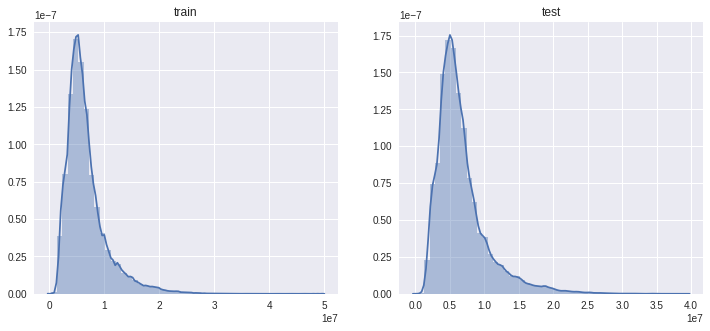

In [64]:
import seaborn as sns
fig, (ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [0]:
# 테스트한다. 스코어확인

In [0]:
# pred_inv= scaler.inverse_transform(predictions.reshape(-1,1)).reshape(-1,)
# pred_inv

In [0]:
# ytest_inv= scaler.inverse_transform(y_test.values.reshape(-1,1)).reshape(-1,)
# ytest_inv

In [67]:
# s1= pd.Series(pred_inv)
# s2= pd.Series(ytest_inv)
s1= pd.Series(predictions)
s2= pd.Series(y_test.values.reshape(-1))

result_df= pd.DataFrame(s1)
result_df.columns=['pred']
result_df['ytest']= s2
result_df['diff']= result_df['ytest']-result_df['pred']
tf= result_df[0:100]
tf

,pred,ytest,diff
0,2.969364e+06,2.865687e+06,-1.036772e+05
1,7.049180e+06,7.021792e+06,-2.738867e+04
2,5.961353e+06,5.158562e+06,-8.027907e+05
3,8.230483e+06,8.549486e+06,3.190025e+05
4,4.273854e+06,4.246244e+06,-2.760942e+04
5,1.129436e+07,1.168907e+07,3.947125e+05
6,1.003121e+07,1.065109e+07,6.198797e+05
7,6.408585e+06,6.252449e+06,-1.561364e+05
8,7.136008e+06,7.084514e+06,-5.149363e+04
9,5.973044e+06,5.854878e+06,-1.181667e+05


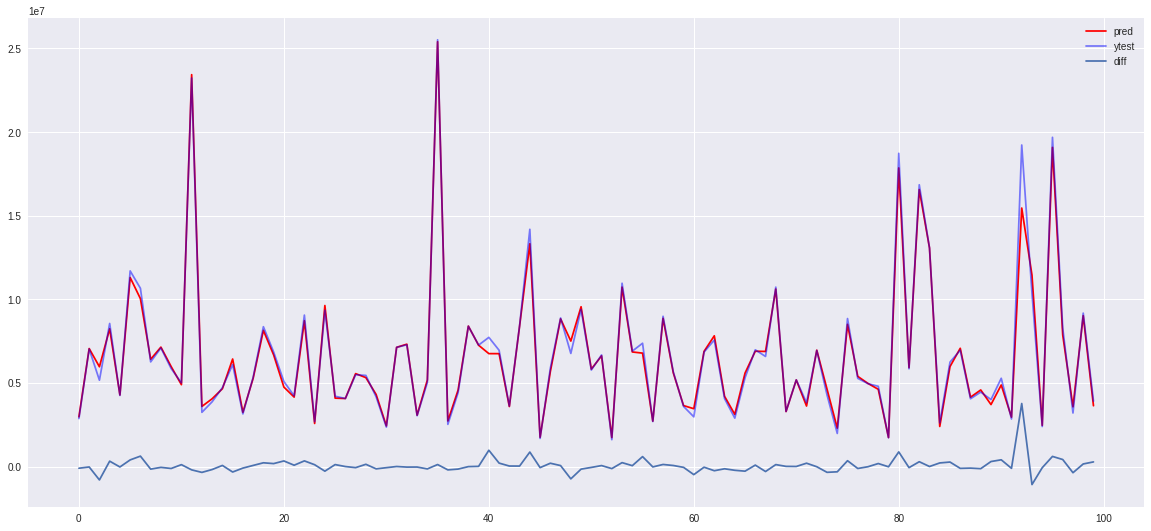

In [68]:
fig= plt.figure(figsize=(20,9))
ax1= fig.add_subplot(1,1,1)
ax1.plot(tf.index, tf['pred'], color='r')
ax1.plot(tf.index, tf['ytest'], color='b', alpha=0.5)
ax1.plot(tf.index, tf['diff'])
ax1.legend()
ax1.grid
plt.show()

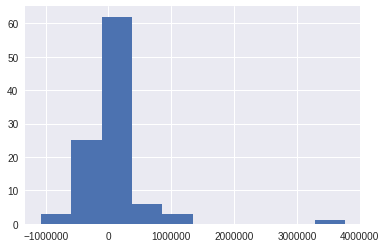

In [69]:
tf['diff'].hist()

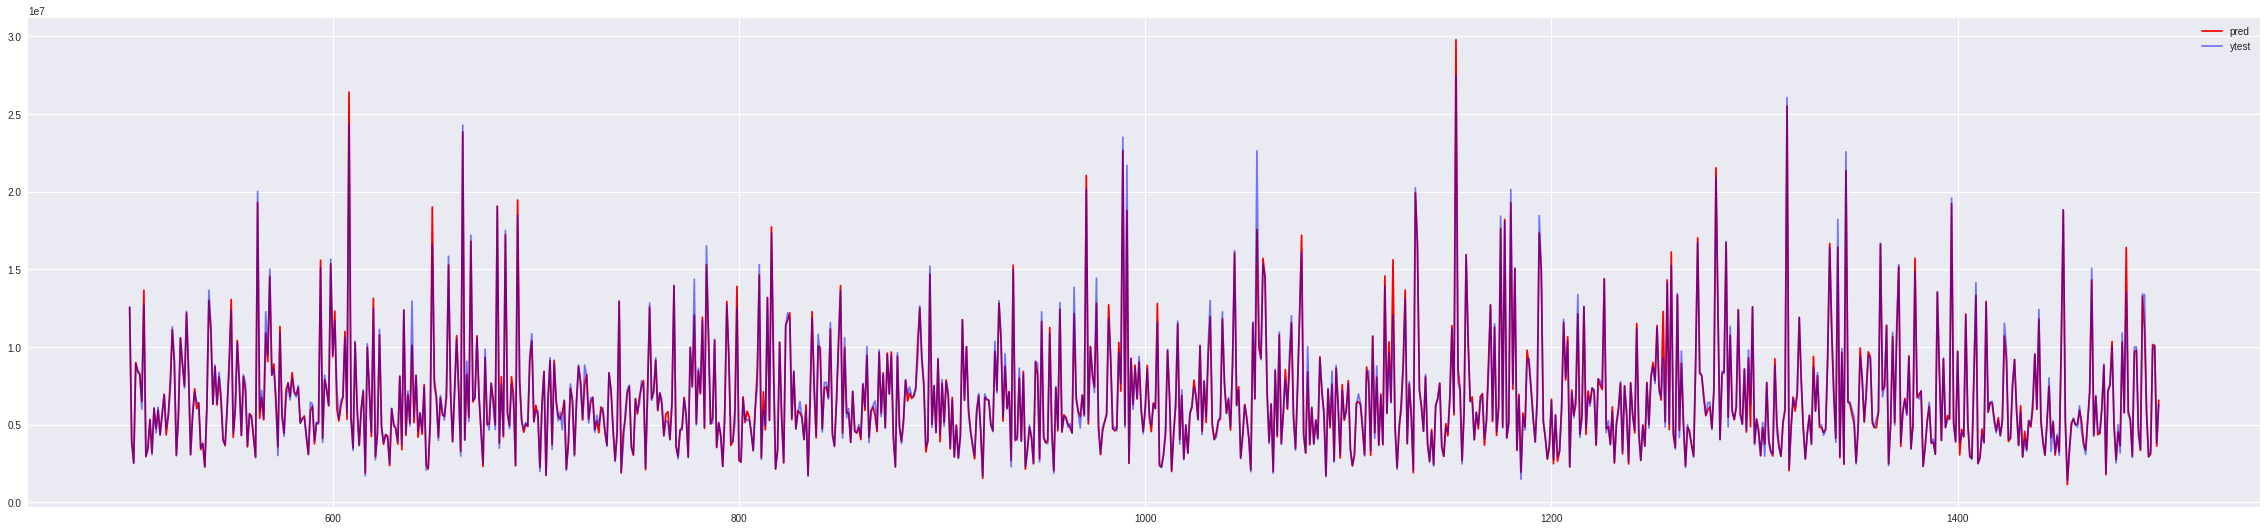

In [70]:
tf1= result_df[500:1500]
fig= plt.figure(figsize=(40,9))
ax1= fig.add_subplot(1,1,1)
ax1.plot(tf1.index, tf1['pred'], color='r')
ax1.plot(tf1.index, tf1['ytest'], color='b', alpha=0.5)
ax1.legend()
ax1.grid
plt.show()


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score


In [0]:
rmse_value= rmse(result_df['pred'], result_df['ytest'])


In [73]:
rmse_value

397861.04020054603

In [74]:
test_raw = pd.read_csv(files[3], encoding='utf-8')
print(test_raw.shape)
test_raw.head()

(3918, 25)


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,462533,3751,1,200912,21~31,1984,83.58,14,37.519926,127.052515,...,15.0,district,cogeneration,6648,107.19,2,3.0,1.0,corridor,0
1,764018,14029,1,201304,1~10,1968,107.17,10,37.572215,126.987643,...,8.0,individual,gas,46184,107.17,10,0.0,0.0,corridor,0
2,813528,12304,1,201309,21~30,1968,36.17,6,37.570067,127.010640,...,4.0,individual,gas,45540,39.66,58,2.0,1.0,stairway,0
3,845097,22241,1,201312,1~10,2007,45.67,8,37.556938,126.859255,...,15.0,individual,gas,19069,87.11,1,3.0,2.0,stairway,0
4,856338,316,1,201401,1~10,1988,41.85,4,37.652256,127.082003,...,5.0,individual,gas,704,56.70,90,2.0,1.0,stairway,0


In [75]:
TE= test_raw.copy()
TE.shape

(3918, 25)

In [0]:

nanIdx = TE[TE['total_parking_capacity_in_site'].isnull()].index #평균적인 세대수대비 주차공간을 계산하여 넣는다.
if nanIdx.any():
    TE.loc[nanIdx, 'total_parking_capacity_in_site']=  TE.loc[nanIdx, 'total_household_count_in_sites']
    
nanIdx = TE[TE['heat_type'].isnull()].index # nan값을 '-'으로 대체한다.
if nanIdx.any():
    TE.loc[nanIdx, 'heat_type']=  '-'

nanIdx = TE[TE['heat_fuel'].isnull()].index # nan값을 '-'으로 대체한다.
if nanIdx.any():
    TE.loc[nanIdx, 'heat_fuel']=  '-'
    
nanIdx = TE[TE['front_door_structure'].isnull()].index # 376개, '-'으로 대체한다.
if nanIdx.any():
    TE.loc[nanIdx, 'front_door_structure']=  '-'
    
    

In [0]:
nanIdx = TE[TE['room_count'].isnull()].index
if nanIdx.any():
    TE.loc[nanIdx, 'room_count'] = TE.loc[nanIdx, 'exclusive_use_area'].apply(fill_room)
    
nanIdx = TE[TE['room_count'] == 0].index
if nanIdx.any():
    TE.loc[nanIdx, 'room_count'] = TE.loc[nanIdx, 'exclusive_use_area'].apply(fill_room)
    

nanIdx = TE[TE['bathroom_count'].isnull()].index
if nanIdx.any():
    TE.loc[nanIdx, 'bathroom_count'] = TE.loc[nanIdx, 'exclusive_use_area'].apply(fill_bathroom)

nanIdx = TE[TE['bathroom_count'] == 0].index
if nanIdx.any():
    TE.loc[nanIdx, 'bathroom_count'] = TE.loc[nanIdx, 'exclusive_use_area'].apply(fill_bathroom)

In [0]:
year=[]
month=[]

for i in TE['transaction_year_month'].values:  
    i= str(i)
    year.append(int(i[2:4]))
    month.append(int(i[4:]))

In [79]:
gu_list= []
for i in TE['address_by_law'].values:
    if str(i)[:2] == '26' or str(i)[:2] == '11':
        gu_list.append(str(i)[:5])
    else:
        gu_list.append('26410')

print(len(gu_list))
# gu_list[:10]

print(len(pd.Series(gu_list).unique())) # 모든 구가 포함되어있음. 41개의 특성으로 원핫인코딩
pd.Series(gu_list).head()

3918
41


0    11680
1    11110
2    11110
3    11500
4    11350
dtype: object

In [80]:
# 주소(동)에 위치한 지하철역 개수

print(subways.shape)
subways_cnt_s= subways['address_by_law'].value_counts()
subways_cnt_list= []

for j in TE['address_by_law'].values:
    try:
        subways_cnt_list.append(subways_cnt_s.loc[j])
    except KeyError:
        subways_cnt_list.append(0)
    

# 주소(동)에 위치한 학교 개수

#schools = pd.read_csv(files[1], encoding='utf-8')
print(schools.shape)
schools_cnt_s= schools['address_by_law'].value_counts()
schools_cnt_list= []

for j in TE['address_by_law'].values:
    try:
        schools_cnt_list.append(schools_cnt_s.loc[j])
    except KeyError:
        schools_cnt_list.append(0)

(405, 5)
(1921, 9)


In [0]:
apt_age_year_list=[]
for i,j in zip(TE['transaction_year_month'].values, TE['year_of_completion'].values) :
    i= str(i)
    apt_age_year_list.append(int(i[0:4]) - j)

In [0]:
TE1 = TE[['key']].copy()
TE1['city'] = TE['city']
TE1['region'] = pd.Series(gu_list)
TE1['address_by_law'] = TE['address_by_law'] # 추가
TE1['subway_count'] = pd.Series(subways_cnt_list)
TE1['school_count'] = pd.Series(schools_cnt_list)
TE1['transcation_year'] = pd.Series(year)
TE1['transcation_month'] = pd.Series(month)
TE1['apt_age_year'] = pd.Series(apt_age_year_list)
#TE1['exclusive_use_area'] = TE['exclusive_use_area'] # 삭제
TE1['floor'] = TE['floor']
TE1['parking_ratio'] = TE['total_parking_capacity_in_site'] / TE['total_household_count_in_sites']
TE1['total_household_count_in_sites'] = TE['total_household_count_in_sites']
TE1['apartment_building_count_in_sites'] = TE['apartment_building_count_in_sites']
TE1['heat_type'] = TE['heat_type']
TE1['heat_fuel'] = TE['heat_fuel']
TE1['area_ratio'] = TE['exclusive_use_area'] / TE['supply_area']
TE1['room_count'] = TE['room_count']
TE1['bathroom_count'] = TE['bathroom_count']
TE1['front_door_structure'] = TE['front_door_structure'] 
TE1['transaction_real_price'] = TE['transaction_real_price'] / TE['exclusive_use_area'] # 변경

In [0]:
def transform_onehot_dummies(s, enc, prefix):
    s_re = s.values.reshape(-1, 1)
    s_1hot = enc.transform(s_re).toarray()
    s_1hot= s_1hot.astype(np.int8)
    print(s_1hot.shape[1])
    
    col_list= []
    for i in range(s_1hot.shape[1]):
        col_list.append(prefix+str(i))
        
    s_df= pd.DataFrame(s_1hot, index= s.index, columns= col_list)

    return s_df


In [84]:
df1_rg = transform_onehot_dummies(TE1['region'], enc= enc_rg, prefix= 'rg')
df1_mo = transform_onehot_dummies(TE1['transcation_month'], enc= enc_mo, prefix= 'mo')
df1_ht = transform_onehot_dummies(TE1['heat_type'], enc= enc_ht, prefix= 'ht')
df1_hf = transform_onehot_dummies(TE1['heat_fuel'], enc= enc_hf, prefix= 'hf')
df1_fd = transform_onehot_dummies(TE1['front_door_structure'], enc= enc_fd, prefix= 'fd')

41
12
4
3
4


In [0]:
try:
    TE1= TE1.join(df1_rg)
except:
    print('dummies_region 이미 추가되었음.')
try:
    #del TE1['region']
    pass
except:
    print('region 컬럼 이미 삭제됨')

try:
    TE1= TE1.join(df1_mo)
except:
    print('dummies_tr_month 이미 추가되었음.')
try:
    del TE1['transcation_month']
except:
    print('transcation_month 컬럼 이미 삭제됨')


try:
    TE1= TE1.join(df1_ht)
except:
    print('dummies_heat_type 이미 추가되었음.')
try:
    del TE1['heat_type']
except:
    print('heat_type 컬럼 이미 삭제됨')
    
try:
    TE1= TE1.join(df1_hf)
except:
    print('dummies_heat_fuel 이미 추가되었음.')
try:
    del TE1['heat_fuel']
except:
    print('heat_fuel 컬럼 이미 삭제됨')

try:
    TE1= TE1.join(df1_fd)
except:
    print('dummies_fr_door_str 이미 추가되었음.')
try:
    del TE1['front_door_structure']
except:
    print('front_door_structure 컬럼 이미 삭제됨')

In [87]:
TE1.head(3)

,key,city,region,address_by_law,subway_count,school_count,transcation_year,apt_age_year,floor,parking_ratio,...,ht1,ht2,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3
0,462533,1,11680,1168010400,2,4,9,25,14,1.0,...,0,1,0,0,1,0,0,1,0,0
1,764018,1,11110,1111013700,0,0,13,45,10,1.0,...,0,0,1,0,0,1,0,1,0,0
2,813528,1,11110,1111017400,1,3,13,45,6,1.0,...,0,0,1,0,0,1,0,0,0,1


In [0]:
# TE1= TE1[['key', 'city', 'subway_count', 'school_count', 'transcation_year',
#        'apt_age_year', 'exclusive_use_area', 'floor', 'parking_ratio',
#        'total_household_count_in_sites', 'apartment_building_count_in_sites',
#        'area_ratio', 'room_count', 'bathroom_count',
#        'rg0', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg7', 'rg8', 'rg9',
#        'rg10', 'rg11', 'rg12', 'rg13', 'rg14', 'rg15', 'rg16', 'rg17', 'rg18',
#        'rg19', 'rg20', 'rg21', 'rg22', 'rg23', 'rg24', 'rg25', 'rg26', 'rg27',
#        'rg28', 'rg29', 'rg30', 'rg31', 'rg32', 'rg33', 'rg34', 'rg35', 'rg36',
#        'rg37', 'rg38', 'rg39', 'rg40', 'mo0', 'mo1', 'mo2', 'mo3', 'mo4',
#        'mo5', 'mo6', 'mo7', 'mo8', 'mo9', 'mo10', 'mo11', 'ht0', 'ht1', 'ht2',
#        'ht3', 'hf0', 'hf1', 'hf2', 'fd0', 'fd1', 'fd2', 'fd3',
#          'transaction_real_price']]

TE1= TE1[['key',      
          'city',
          'region',
          'address_by_law',
          'subway_count', 'school_count',
          'rg0', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg7', 'rg8', 'rg9',
          'rg10', 'rg11', 'rg12', 'rg13', 'rg14', 'rg15', 'rg16', 'rg17', 'rg18',
          'rg19', 'rg20', 'rg21', 'rg22', 'rg23', 'rg24', 'rg25', 'rg26', 'rg27',
          'rg28', 'rg29', 'rg30', 'rg31', 'rg32', 'rg33', 'rg34', 'rg35', 'rg36',
          'rg37', 'rg38', 'rg39', 'rg40',
          'transcation_year', 'mo0', 'mo1', 'mo2', 'mo3', 'mo4',
          'mo5', 'mo6', 'mo7', 'mo8', 'mo9', 'mo10', 'mo11',
          'apt_age_year', 'floor', 'parking_ratio',
          'total_household_count_in_sites', 'apartment_building_count_in_sites',
          'area_ratio', 'room_count', 'bathroom_count',
          'ht0', 'ht1', 'ht2','ht3', 
          'hf0', 'hf1', 'hf2', 'fd0', 'fd1', 'fd2', 'fd3',
          'transaction_real_price']]



In [0]:
# TR1_scale_col= ['subway_count','school_count','transcation_year', 'apt_age_year',
#                 'exclusive_use_area', 'floor','parking_ratio',
#                 'total_household_count_in_sites','apartment_building_count_in_sites','area_ratio',
#                 'room_count','bathroom_count','transaction_real_price']


# for i, col in enumerate(TR1_scale_col):
#     #print(i, col)
#     TR1[col]= scaler_list[i].transform(TR1[col].values.reshape(-1,1)).reshape(-1,)


# TR1.head()

In [0]:
df_temp = TE1['address_by_law'].map(dong_score_dict)
TE1['dong_score']= df_temp

In [0]:
TE2= TE1[['key',      
          'city',
          'dong_score',
          'subway_count', 'school_count',
          'rg0', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg7', 'rg8', 'rg9',
          'rg10', 'rg11', 'rg12', 'rg13', 'rg14', 'rg15', 'rg16', 'rg17', 'rg18',
          'rg19', 'rg20', 'rg21', 'rg22', 'rg23', 'rg24', 'rg25', 'rg26', 'rg27',
          'rg28', 'rg29', 'rg30', 'rg31', 'rg32', 'rg33', 'rg34', 'rg35', 'rg36',
          'rg37', 'rg38', 'rg39', 'rg40',
          'transcation_year', 'mo0', 'mo1', 'mo2', 'mo3', 'mo4',
          'mo5', 'mo6', 'mo7', 'mo8', 'mo9', 'mo10', 'mo11',
          'apt_age_year', 'floor', 'parking_ratio',
          'total_household_count_in_sites', 'apartment_building_count_in_sites',
          'area_ratio', 'room_count', 'bathroom_count',
          'ht0', 'ht1', 'ht2','ht3', 
          'hf0', 'hf1', 'hf2', 'fd0', 'fd1', 'fd2', 'fd3',
          'transaction_real_price']]

In [0]:
del TE2['transaction_real_price']

In [0]:
X_test= TE2[TE2.columns[1:]]

In [100]:
X_test.head()

,city,dong_score,subway_count,school_count,rg0,rg1,rg2,rg3,rg4,rg5,...,ht1,ht2,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3
0,1,2.0,2,4,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,NaN,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,3.0,1,3,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,2.0,2,19,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,1,1.0,1,24,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [102]:
X_test['dong_score']= X_test.loc[:,'dong_score'].fillna(2)
X_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,dong_score,subway_count,school_count,rg0,rg1,rg2,rg3,rg4,rg5,...,ht1,ht2,ht3,hf0,hf1,hf2,fd0,fd1,fd2,fd3
0,1,2.0,2,4,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,2.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,3.0,1,3,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,2.0,2,19,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,1,1.0,1,24,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [103]:
pred1= rf.predict(X_test)
print(pred1.shape)

#pred_inv1= scaler.inverse_transform(pred1.reshape(-1,1)).reshape(-1,)
#pred_inv1




(3918,)


In [104]:
s1= TE2['key']
#s2= pd.Series(pred_inv1)
s2= pd.Series(pred1)
result_df1= pd.DataFrame(s1)
result_df1.columns=['key']
result_df1['pred']= s2 * TE['exclusive_use_area']

result_df1.head()


,key,pred
0,462533,9.745650e+08
1,764018,5.730825e+08
2,813528,1.796929e+08
3,845097,2.382253e+08
4,856338,1.911185e+08


In [0]:
#pip install openpyxl
result_df1.to_csv('./result_df2.csv')

In [0]:
enc_rg.categories_

[array(['11110', '11140', '11170', '11200', '11215', '11230', '11260',
        '11290', '11305', '11320', '11350', '11380', '11410', '11440',
        '11470', '11500', '11530', '11545', '11560', '11590', '11620',
        '11650', '11680', '11710', '11740', '26110', '26140', '26170',
        '26200', '26230', '26260', '26290', '26320', '26350', '26380',
        '26410', '26440', '26470', '26500', '26530', '26710'], dtype=object)]

In [0]:
enc_ht.categories_

[array(['-', 'central', 'district', 'individual'], dtype=object)]